# <center>Assignment_Logistic Regression</center>

__Problem Statement__:Output variable -> y
y -> Whether the client has subscribed a term deposit or not 
Binomial ("yes" or "no")

In [1]:
import pandas as pd

In [2]:
# loading banks data and viewing first 10 rows
bank_data = pd.read_csv("bank-full.csv",sep=';')
bank_data.head(10) 

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
5,35,management,married,tertiary,no,231,yes,no,unknown,5,may,139,1,-1,0,unknown,no
6,28,management,single,tertiary,no,447,yes,yes,unknown,5,may,217,1,-1,0,unknown,no
7,42,entrepreneur,divorced,tertiary,yes,2,yes,no,unknown,5,may,380,1,-1,0,unknown,no
8,58,retired,married,primary,no,121,yes,no,unknown,5,may,50,1,-1,0,unknown,no
9,43,technician,single,secondary,no,593,yes,no,unknown,5,may,55,1,-1,0,unknown,no


In [3]:
bank_data.shape

(45211, 17)

## Inspecting and cleaning the frame

In [4]:
# check for missing value and datatype and viewing data through heatmap
def inspection(dataframe):
    import pandas as pd
    import seaborn as sns
    
    print("Data types of variables")
    print(dataframe.dtypes,'\n')
    print("Sample with missing Values:")
    print(dataframe.isnull().any(axis=1).sum(),'\n')
    print("Missing Values per Variable")
    print(dataframe.isnull().sum(),'\n')
    print("Heatmap for bank data having null values:")
    sns.heatmap(dataframe.isnull())
    

Data types of variables
age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
y            object
dtype: object 

Sample with missing Values:
0 

Missing Values per Variable
age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64 

Heatmap for bank data having null values:


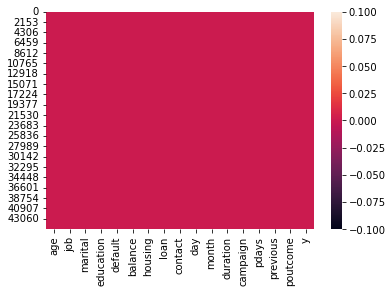

In [5]:
inspection(bank_data)

#### observations
1. there are no missing values in data set for bank.
2. data has datatype as int for age, balance, day,campaign,,duration,pdays rest columns are object type ie. string, and also the target Variable (y )  is also string in given data set.

In [6]:
# drop na value from data set
bank_data_drop_na=bank_data.dropna()
bank_data

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


### since there are no null values, we have same number of observations as 45211

## Extracting unique values for all columns

In [7]:
# check unique values for columns
def unique_values(dataframe,variables):
    for v in variables:
        print(" uniques values for Varirable: ",v)
        print( dataframe[v].unique(),"\n")

In [8]:
unique_values(bank_data, bank_data.columns)

 uniques values for Varirable:  age
[58 44 33 47 35 28 42 43 41 29 53 57 51 45 60 56 32 25 40 39 52 46 36 49
 59 37 50 54 55 48 24 38 31 30 27 34 23 26 61 22 21 20 66 62 83 75 67 70
 65 68 64 69 72 71 19 76 85 63 90 82 73 74 78 80 94 79 77 86 95 81 18 89
 84 87 92 93 88] 

 uniques values for Varirable:  job
['management' 'technician' 'entrepreneur' 'blue-collar' 'unknown'
 'retired' 'admin.' 'services' 'self-employed' 'unemployed' 'housemaid'
 'student'] 

 uniques values for Varirable:  marital
['married' 'single' 'divorced'] 

 uniques values for Varirable:  education
['tertiary' 'secondary' 'unknown' 'primary'] 

 uniques values for Varirable:  default
['no' 'yes'] 

 uniques values for Varirable:  balance
[ 2143    29     2 ...  8205 14204 16353] 

 uniques values for Varirable:  housing
['yes' 'no'] 

 uniques values for Varirable:  loan
['no' 'yes'] 

 uniques values for Varirable:  contact
['unknown' 'cellular' 'telephone'] 

 uniques values for Varirable:  day
[ 5  6  7  8  9 

In [9]:
"""Categorical variables we have are :"""
print("Categorical  values for Varirable:  job")
print(['management', 'technician' ,'entrepreneur', 'blue-collar' ,'unknown','retired' ,'admin.',
       'services' ,'self-employed', 'unemployed', 'housemaid','student'],'\n')
 
print("Categorical values for Varirable:  marital")
print(['married', 'single', 'divorced'],'\n')

print("Categorical values for Varirable:  education " )
print(['tertiary', 'secondary', 'unknown' ,'primary'],'\n')

print("Categorical values for Varirable:  default " )
print(['no','yes'],'\n') 

print("Categorical values for Varirable:  housing " )
print(['yes', 'no'],'\n') 

print("Categorical values for Varirable: loan " )
print(['no','yes'] ,'\n')

print("Categorical values for Varirable: contact,'\'n':['unknown' 'cellular' 'telephone'] ")

print("Categorical values for Varirable: month " )
print(['may' ,'jun', 'jul', 'aug', 'oct', 'nov', 'dec' ,'jan', 'feb', 'mar', 'apr' ,'sep'],'\n' )

print("Categorical values for Varirable: poutcome " )
print(['unknown', 'failure', 'other', 'success'],'\n')

print("Categorical values for Varirable:  y")
print(['no', 'yes'],'\n' )



Categorical  values for Varirable:  job
['management', 'technician', 'entrepreneur', 'blue-collar', 'unknown', 'retired', 'admin.', 'services', 'self-employed', 'unemployed', 'housemaid', 'student'] 

Categorical values for Varirable:  marital
['married', 'single', 'divorced'] 

Categorical values for Varirable:  education 
['tertiary', 'secondary', 'unknown', 'primary'] 

Categorical values for Varirable:  default 
['no', 'yes'] 

Categorical values for Varirable:  housing 
['yes', 'no'] 

Categorical values for Varirable: loan 
['no', 'yes'] 

Categorical values for Varirable: contact,''n':['unknown' 'cellular' 'telephone'] 
Categorical values for Varirable: month 
['may', 'jun', 'jul', 'aug', 'oct', 'nov', 'dec', 'jan', 'feb', 'mar', 'apr', 'sep'] 

Categorical values for Varirable: poutcome 
['unknown', 'failure', 'other', 'success'] 

Categorical values for Varirable:  y
['no', 'yes'] 



In [10]:
# for Encoding categorical variables
def encode_categoreis(dataframe, variables):
    from sklearn.preprocessing import OrdinalEncoder
    ord_enc=OrdinalEncoder()
    for v in variables:
        name=v+'_code'
        dataframe[name]=ord_enc.fit_transform(dataframe[[v]])
        print('The encoded values for '+v+' are:')
        print(dataframe[name].unique(),'\n')
        print("_______________________________________________________________________________________________")

In [11]:
bank_data.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

In [12]:
encode_categoreis(bank_data,['job','marital','education','default','housing' ,'loan','contact' ,'month' ,'poutcome' ,'y' ])

The encoded values for job are:
[ 4.  9.  2.  1. 11.  5.  0.  7.  6. 10.  3.  8.] 

_______________________________________________________________________________________________
The encoded values for marital are:
[1. 2. 0.] 

_______________________________________________________________________________________________
The encoded values for education are:
[2. 1. 3. 0.] 

_______________________________________________________________________________________________
The encoded values for default are:
[0. 1.] 

_______________________________________________________________________________________________
The encoded values for housing are:
[1. 0.] 

_______________________________________________________________________________________________
The encoded values for loan are:
[0. 1.] 

_______________________________________________________________________________________________
The encoded values for contact are:
[2. 0. 1.] 

_____________________________________________________

In [13]:
# Data Visualizations: plot scatter plots of all Independent variables against classification varaible(y)
def plot_scatterplots(dataframe,cols_to_exculde,class_col):
    import numpy as np
    import seaborn as sns
    import warnings 
    
    warnings.filterwarnings("ignore") # to supress warnings
    
    #choosing only columns with numerical value
    cols=dataframe.select_dtypes(include=np.number).columns.tolist()
    X=dataframe[cols]
    x=X[X.columns.difference([class_col])]
    for col in X.columns.difference([class_col]):
        g=sns.FacetGrid(dataframe)
        g.map(sns.scatterplot,col,class_col)


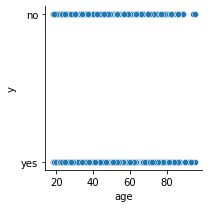

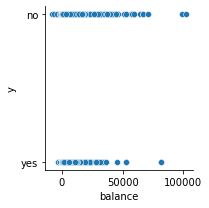

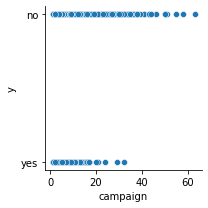

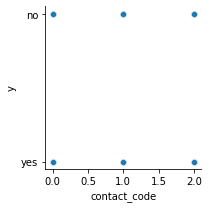

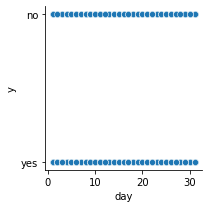

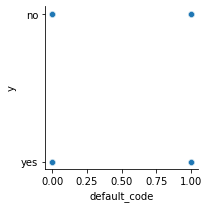

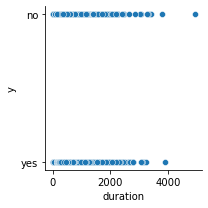

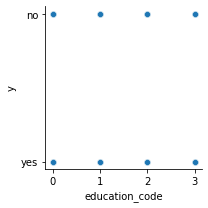

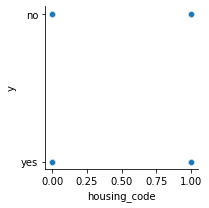

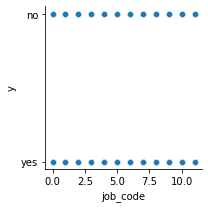

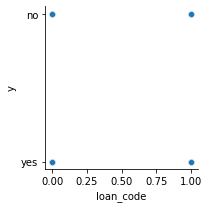

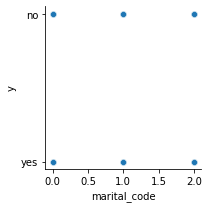

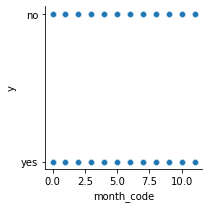

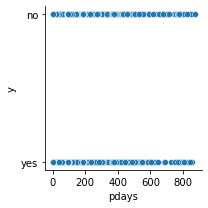

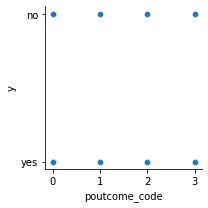

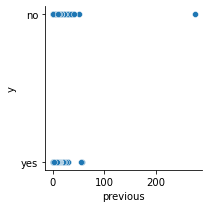

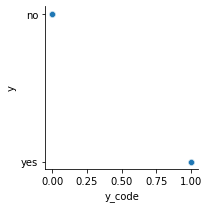

In [14]:
plot_scatterplots(bank_data,['contact','contact_code'],'y')

In [15]:
 #full diagnostics
def full_diagnostic(dataframe,class_col,cols_to_exclude):
    import seaborn as sns
    import numpy as np
    
    #find all numerical columns from bank_data
    cols=dataframe.select_dtypes(include=np.number).columns.tolist()
    X=dataframe[cols]
    X=X[X.columns.difference(cols_to_exclude)]
    #X=X[X.columns.difference([class_col])]
    sns.pairplot(bank_data,hue=class_col)

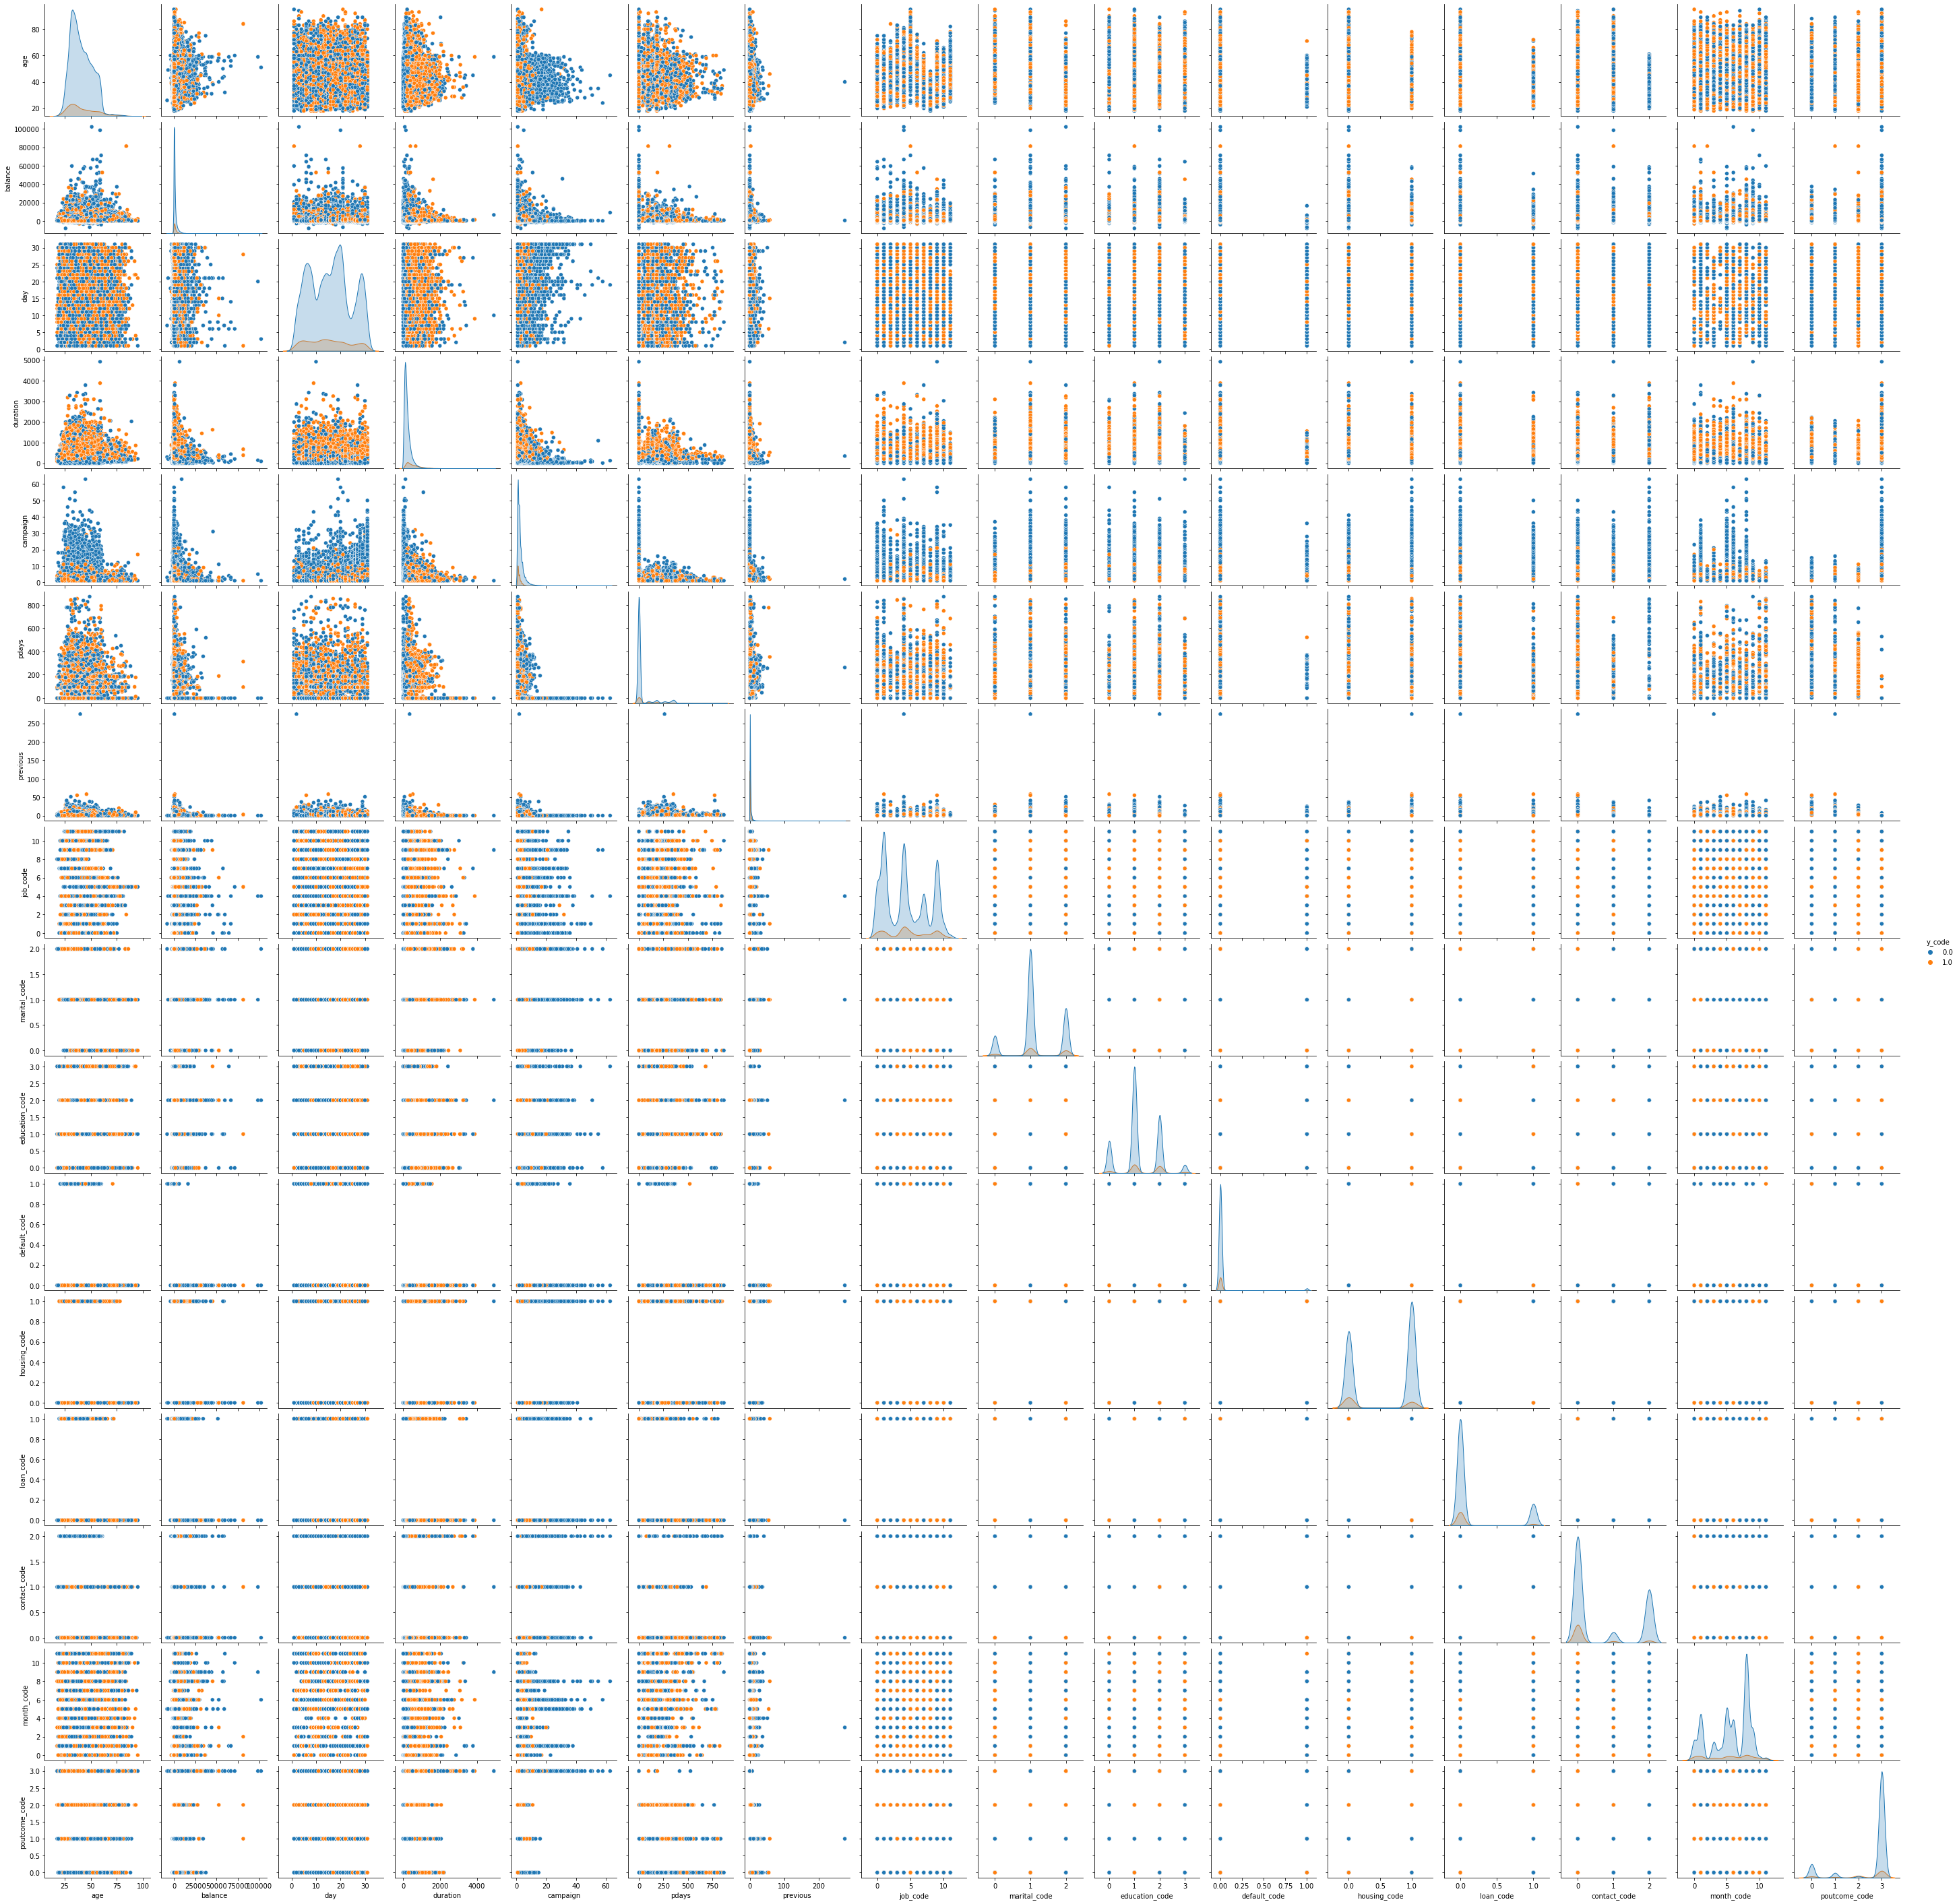

In [16]:
full_diagnostic(bank_data,class_col='y_code',cols_to_exclude=['contact','contact_code'])

#full_diagnostic(df,class_col = 'churn',cols_to_exclude=['customer_id','phone_no', 'year'])

In [17]:
#ploting for slective columns only
def selected_diagnostic(dataframe, class_col,cols_to_evaluate):
    import seaborn as sns
    cols_to_evaluate.append(class_col)
    X=dataframe[cols_to_evaluate]
    sns.pairplot(X,hue=class_col)

In [18]:
bank_data.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y', 'job_code', 'marital_code',
       'education_code', 'default_code', 'housing_code', 'loan_code',
       'contact_code', 'month_code', 'poutcome_code', 'y_code'],
      dtype='object')

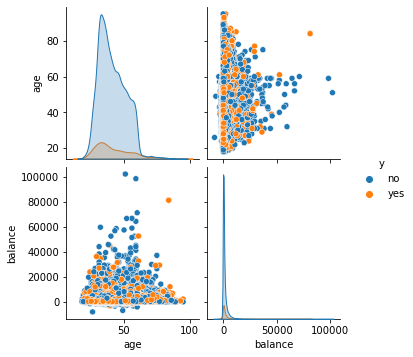

In [19]:
selected_diagnostic(bank_data,class_col='y',cols_to_evaluate=['age','balance'])

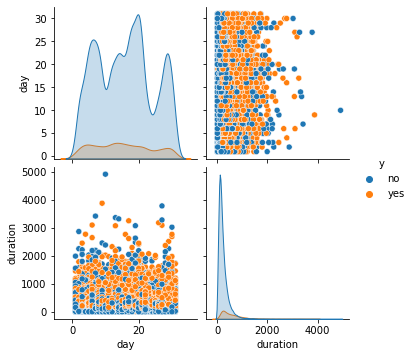

In [20]:
selected_diagnostic(bank_data,class_col='y',cols_to_evaluate=['day', 'duration'])

'age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y', 'job_code', 'marital_code',
       'education_code', 'default_code', 'housing_code', 'loan_code',
       'contact_code', 'month_code', 'poutcome_code', 'y_code'],

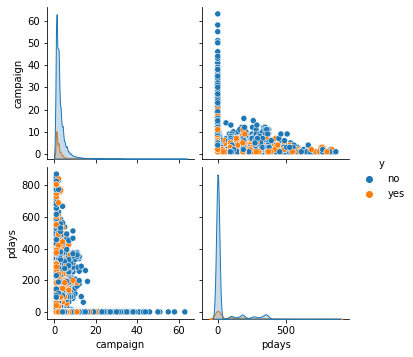

In [21]:
selected_diagnostic(bank_data,class_col='y',cols_to_evaluate=['campaign', 'pdays'])

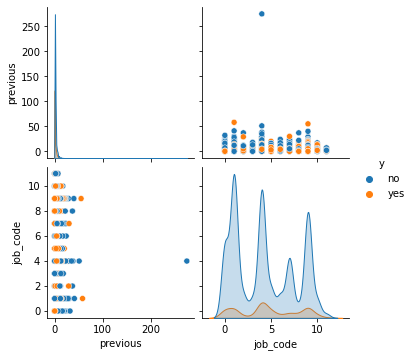

In [22]:
selected_diagnostic(bank_data,class_col='y',cols_to_evaluate=['previous','job_code'])  

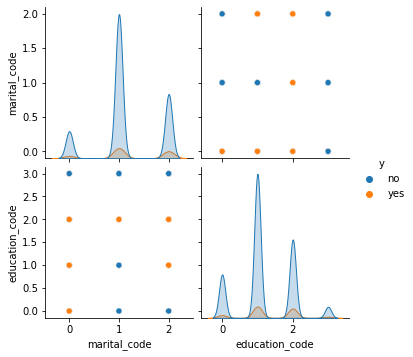

In [23]:
selected_diagnostic(bank_data,class_col='y',cols_to_evaluate=['marital_code',
       'education_code'])

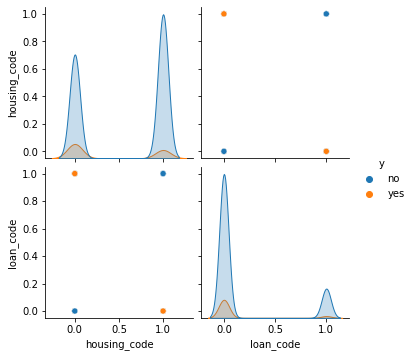

In [24]:
selected_diagnostic(bank_data,class_col='y',cols_to_evaluate=['housing_code', 'loan_code'])

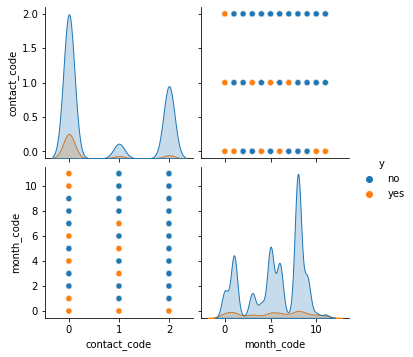

In [25]:
selected_diagnostic(bank_data,class_col='y',cols_to_evaluate=['contact_code', 'month_code'])

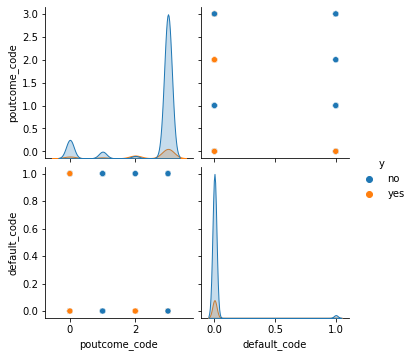

In [26]:
selected_diagnostic(bank_data,class_col='y',cols_to_evaluate=['poutcome_code','default_code'])

'age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y', 'job_code', 'marital_code',
       'education_code', 'default_code', 'housing_code', 'loan_code',
       'contact_code', 'month_code', , 'y_code'],

## Running the Logistic regression using Stats model

In [27]:
def logistic_regression(dataframe,class_cols,cols_to_exclude):
    import statsmodels.api as sm
    import numpy as np
    cols=dataframe.select_dtypes(include=np.number).columns.tolist()
    X=dataframe[cols]
    X=X[X.columns.difference([class_cols])]
    X=X[X.columns.difference(cols_to_exclude)]
    
    y=dataframe[class_cols]
    logit_model=sm.Logit(y,X)
    result=logit_model.fit()
    print(result.summary2())

In [28]:
logistic_regression(bank_data,class_cols='y_code',cols_to_exclude=['job','marital','housing','contact','day''month','education_code','month_code', 'pdays', 'default_code'])

Optimization terminated successfully.
         Current function value: 0.276491
         Iterations 8
                         Results: Logit
Model:              Logit            Pseudo R-squared: 0.234     
Dependent Variable: y_code           AIC:              25024.8255
Date:               2022-05-25 18:51 BIC:              25129.4547
No. Observations:   45211            Log-Likelihood:   -12500.   
Df Model:           11               LL-Null:          -16315.   
Df Residuals:       45199            LLR p-value:      0.0000    
Converged:          1.0000           Scale:            1.0000    
No. Iterations:     8.0000                                       
-----------------------------------------------------------------
                  Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
-----------------------------------------------------------------
age              -0.0224   0.0011 -20.4326 0.0000 -0.0245 -0.0202
balance           0.0000   0.0000   4.6553 0.0000  0.0000  0.0000


In [29]:
import math
math.exp(0.0576)

1.0592911944779007

In [30]:
## building model using sklearn

In [31]:
def sklear_model_prepare(dataframe,class_col,cols_to_exclude):
    from sklearn.model_selection import train_test_split
    import numpy as np
    ##Selecting only the numerical columns and excluding the columns we specified in the function
    cols=dataframe.select_dtypes(include=np.number).columns.tolist() 
    X=dataframe[cols]
    X = X[X.columns.difference([class_col])] 
    X = X[X.columns.difference(cols_to_exclude)]
    ##Selecting y as a column
    y=dataframe[class_col]
    global X_train, X_test, y_train, y_test #This allow us to do call these variables outside this function
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0) # perform train test split


In [32]:
def run_model(X_train,X_test,y_train,y_test):
    from sklearn.linear_model import LogisticRegression
    from sklearn.metrics import roc_auc_score,classification_report
    global logreg #Defines the logistic model as a global model that can be used outside of this function
    ##Fitting the logistic regression
    logreg = LogisticRegression(random_state = 13)
    logreg.fit(X_train, y_train) # fit the model
    ##Predicting y values
    global y_pred #Defines the Y_Pred as a global variable that can be used outside of this function
    y_pred = logreg.predict(X_test) # make predictions on th test data
    logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
    print(classification_report(y_test, y_pred)) # check for classification report 
    print("The area under the curve is: %0.2f"%logit_roc_auc)  # check for  AUC

In [33]:
sklear_model_prepare(bank_data,class_col='y_code',cols_to_exclude=['job','marital','housing','contact','day''month','education_code','month_code', 'pdays', 'default_code'])

In [34]:
run_model(X_train,X_test,y_train,y_test)

              precision    recall  f1-score   support

         0.0       0.90      0.98      0.94     11969
         1.0       0.54      0.17      0.26      1595

    accuracy                           0.89     13564
   macro avg       0.72      0.58      0.60     13564
weighted avg       0.86      0.89      0.86     13564

The area under the curve is: 0.58


In [35]:
def confusion_matrix(y_test,y_pred):
    from sklearn.metrics import confusion_matrix
    confusion_matrix = confusion_matrix(y_test, y_pred) # confusion matrix 
    print(confusion_matrix)

    tn, fp, fn, tp = confusion_matrix.ravel()
    print('TN: %0.2f'% tn)
    print('TP: %0.2f'% tp)
    print('FP: %0.2f'%fp)
    print('FN: %0.2f'%fn)

In [36]:
def roc_curve (logreg,X_test,y_test):
    import matplotlib.pyplot as plt 
    from sklearn.metrics import roc_auc_score
    from sklearn.metrics import roc_curve
    logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test)) # ROC AUC score 
    fpr, tpr, thresholds = roc_curve(y_test, logreg.predict(X_test)) # ROC curve
    #Setting the graph area
    plt.figure()
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])

    #Plotting the worst line possiple
    plt.plot([0, 1], [0, 1],'b--')

    #Plotting the logistic regression we have built
    plt.plot(fpr, tpr, color='darkorange', label='Logistic Regression (area = %0.2f)' % logit_roc_auc)

    #Adding labels and etc
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend(loc="lower right")
    plt.savefig('Log_ROC')
    plt.show()

In [37]:
sklear_model_prepare(bank_data,class_col='y_code',cols_to_exclude=['job','marital','housing','contact','day''month','education_code','month_code', 'pdays', 'default_code'])

In [38]:
confusion_matrix(y_test,y_pred)

[[11741   228]
 [ 1323   272]]
TN: 11741.00
TP: 272.00
FP: 228.00
FN: 1323.00


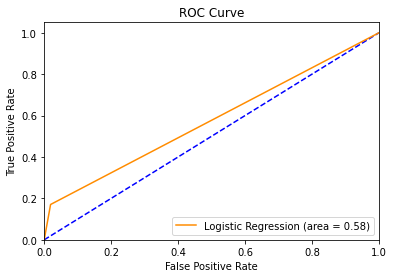

In [39]:
roc_curve (logreg,X_test,y_test)

In [40]:
# save the model using pickle function 
import pickle
pickle.dump(logreg, open('model1.pkl', 'wb'))

In [41]:
# load the saved model 
model = pickle.load(open('model1.pkl', 'rb'))

In [42]:
# make predictions on the test data
model.predict(X_test)

array([0., 1., 0., ..., 0., 0., 0.])

In [43]:
# check the target variable
bank_data['y_code'].describe()

count    45211.000000
mean         0.116985
std          0.321406
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: y_code, dtype: float64

In [44]:
# class imbalance method 1 
def run_model_bweights(X_train,X_test,y_train,y_test):
    from sklearn.linear_model import LogisticRegression
    from sklearn.metrics import roc_auc_score,classification_report
    global logreg
    logreg = LogisticRegression(random_state = 13,class_weight = 'balanced') # define class_weight parameter
    logreg.fit(X_train, y_train) # fit the model 
    global y_pred
    y_pred = logreg.predict(X_test) # predict on test data
    logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test)) # ROC AUC score
    print(classification_report(y_test, y_pred)) 
    print("The area under the curve is: %0.2f"%logit_roc_auc) # AUC curve

In [45]:
run_model_bweights(X_train,X_test,y_train,y_test)

              precision    recall  f1-score   support

         0.0       0.96      0.79      0.87     11969
         1.0       0.33      0.76      0.46      1595

    accuracy                           0.79     13564
   macro avg       0.64      0.77      0.66     13564
weighted avg       0.89      0.79      0.82     13564

The area under the curve is: 0.77


In [46]:
#class imbalance method 2
def run_model_aweights(X_train,X_test,y_train,y_test,w):
    from sklearn.linear_model import LogisticRegression
    from sklearn.metrics import roc_auc_score,classification_report
    global logreg
    logreg = LogisticRegression(random_state = 13,class_weight=w) # define class_weight parameter
    logreg.fit(X_train, y_train) # fit the model 
    global y_pred
    y_pred = logreg.predict(X_test) # predict on test data
    logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))  # ROC AUC score
    print(classification_report(y_test, y_pred))
    print("The area under the curve is: %0.2f"%logit_roc_auc)  # AUC curve

In [47]:
run_model_aweights(X_train,X_test,y_train,y_test,{0:90, 1:10})

              precision    recall  f1-score   support

         0.0       0.88      1.00      0.94     11969
         1.0       0.39      0.00      0.01      1595

    accuracy                           0.88     13564
   macro avg       0.64      0.50      0.47     13564
weighted avg       0.82      0.88      0.83     13564

The area under the curve is: 0.50


In [48]:
# class imbalance method 3
def adjust_imbalance (X_train,y_train,class_col):
    from sklearn.utils import resample
    import pandas as pd
    X = pd.concat([X_train, y_train], axis=1)

    # separate the 2 classes
    class0 = X[X[class_col]==0]
    class1 = X[X[class_col]==1]

    # Case 1 - bootstraps from the minority class
    if len(class1)<len(class0):
        resampled = resample(class1,
                             replace=True, 
                             n_samples=len(class0), 
                             random_state=10) 
        resampled_df = pd.concat([resampled, class0])

  # Case 1 - ressamples from the majority class
    else:
        resampled = resample(class1,
                             replace=False, 
                             n_samples=len(class0), 
                             random_state=10) 
        resampled_df = pd.concat([resampled, class0])

    return resampled_df

In [49]:
resampled_df = adjust_imbalance (X_train,y_train,class_col = 'y_code')

In [50]:
sklear_model_prepare(resampled_df,class_col = 'y_code',cols_to_exclude=['job','marital','housing','contact','day''month','education_code','month_code', 'pdays', 'default_code'])
run_model(X_train,X_test,y_train,y_test)

              precision    recall  f1-score   support

         0.0       0.77      0.80      0.79      8421
         1.0       0.79      0.76      0.78      8351

    accuracy                           0.78     16772
   macro avg       0.78      0.78      0.78     16772
weighted avg       0.78      0.78      0.78     16772

The area under the curve is: 0.78


In [51]:
def prepare_model_smote(df,class_col,cols_to_exclude):
#Synthetic Minority Oversampling Technique. Generates new instances from existing minority cases that you supply as input. 
    from sklearn.model_selection import train_test_split
    import numpy as np
    from imblearn.over_sampling import SMOTE
    cols=df.select_dtypes(include=np.number).columns.tolist() 
    X=df[cols]
    X = X[X.columns.difference([class_col])]
    X = X[X.columns.difference(cols_to_exclude)]
    y=df[class_col]
    global X_train, X_test, y_train, y_test
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
    sm = SMOTE(random_state=0, sampling_strategy=1.0)
    X_train, y_train = sm.fit_resample(X_train, y_train) 

In [52]:
prepare_model_smote(bank_data,class_col = 'y_code',cols_to_exclude=['job','marital','housing','contact','day''month','education_code','month_code', 'pdays', 'default_code'])
run_model(X_train,X_test,y_train,y_test)

              precision    recall  f1-score   support

         0.0       0.95      0.80      0.87     11969
         1.0       0.32      0.72      0.45      1595

    accuracy                           0.79     13564
   macro avg       0.64      0.76      0.66     13564
weighted avg       0.88      0.79      0.82     13564

The area under the curve is: 0.76


**Predictions**

In [53]:
run_model(X_train,X_test,y_train,y_test)

              precision    recall  f1-score   support

         0.0       0.95      0.80      0.87     11969
         1.0       0.32      0.72      0.45      1595

    accuracy                           0.79     13564
   macro avg       0.64      0.76      0.66     13564
weighted avg       0.88      0.79      0.82     13564

The area under the curve is: 0.76


__Feature selection__

In [54]:
class_col = 'y_code'
cols_to_exclude=['job','marital','housing','contact','day''month','education_code','month_code', 'pdays', 'default_code']


# function for feature selection 
def var_threshold_selection(dataframe,cols_to_exclude,class_col,threshold):
    from sklearn.feature_selection import VarianceThreshold
    import numpy as np
    from sklearn import preprocessing

    cols=dataframe.select_dtypes(include=np.number).columns.tolist() #finding all the numerical columns from the dataframe
    X=dataframe[cols] #creating a dataframe only with the numerical columns
    X = X[X.columns.difference(cols_to_exclude)] #columns to exclude
    X = X[X.columns.difference([class_col])]
    ## Scaling variables
    scaler = preprocessing.StandardScaler().fit(X)
    X_scaled = scaler.transform(X)
    var_thr = VarianceThreshold(threshold = threshold) #Removing both constant and quasi-constant
    var_thr.fit(X_scaled)
    var_thr.get_support()

    global selected_cols
    selected_cols = X.columns[var_thr.get_support()]

    print("The selected features are: ")
    print(list(selected_cols))

In [55]:
var_threshold_selection(bank_data,cols_to_exclude=['job','marital','housing','contact','day''month','education_code','month_code', 'pdays', 'default_code'],class_col = 'y_code',threshold=1)

The selected features are: 
['day', 'duration', 'housing_code', 'job_code', 'poutcome_code']


In [56]:
sklear_model_prepare(resampled_df,class_col = 'y_code',cols_to_exclude=['job','marital','housing','contact','day''month','education_code','month_code', 'pdays', 'default_code'])

run_model(X_train,X_test,y_train,y_test)

              precision    recall  f1-score   support

         0.0       0.77      0.80      0.79      8421
         1.0       0.79      0.76      0.78      8351

    accuracy                           0.78     16772
   macro avg       0.78      0.78      0.78     16772
weighted avg       0.78      0.78      0.78     16772

The area under the curve is: 0.78


In [57]:
# RFE for feature selection 
def rfe_selection(dataframe,cols_to_exclude,class_col,model):
    import warnings
    warnings.filterwarnings("ignore")
    import numpy as np
    from sklearn.feature_selection import RFE

    cols=dataframe.select_dtypes(include=np.number).columns.tolist() #finding all the numerical columns from the dataframe
    X=dataframe[cols] #creating a dataframe only with the numerical columns
    X = X[X.columns.difference(cols_to_exclude)] #columns to exclude
    X = X[X.columns.difference([class_col])]
    y = dataframe[class_col]

    rfe = RFE(model)
    rfe = rfe.fit(X, y) # fit the model 
    global selected_cols
    selected_cols = X.columns[rfe.support_]

    print("The selected features are: ")
    print(list(selected_cols))


In [58]:
rfe_selection(bank_data,class_col = 'y_code',cols_to_exclude=['job','marital','housing','contact','day''month','education_code','month_code', 'pdays', 'default_code']
,model=logreg)

The selected features are: 
['campaign', 'contact_code', 'housing_code', 'loan_code', 'marital_code', 'previous']


In [59]:
sklear_model_prepare(resampled_df,class_col = 'y_code',cols_to_exclude=['job','marital','housing','contact','day''month','education_code','month_code', 'pdays', 'default_code'])

run_model(X_train,X_test,y_train,y_test)

              precision    recall  f1-score   support

         0.0       0.77      0.80      0.79      8421
         1.0       0.79      0.76      0.78      8351

    accuracy                           0.78     16772
   macro avg       0.78      0.78      0.78     16772
weighted avg       0.78      0.78      0.78     16772

The area under the curve is: 0.78
